# Model Selection:

In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/clean_reviews.csv")  # Make sure this file is created in preprocessing
X = df["review"]
y = df["sentiment"]


### Split train/test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Pipilining:


In [54]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')),
    ('svm', LinearSVC())
])

###  Hyperparameter tuning

In [55]:
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'svm__C': 0.1}
Best cross-val accuracy: 0.890025


## Eval best model:

In [56]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Accuracy: 0.8981


# Model Evaluation & diagnostics:

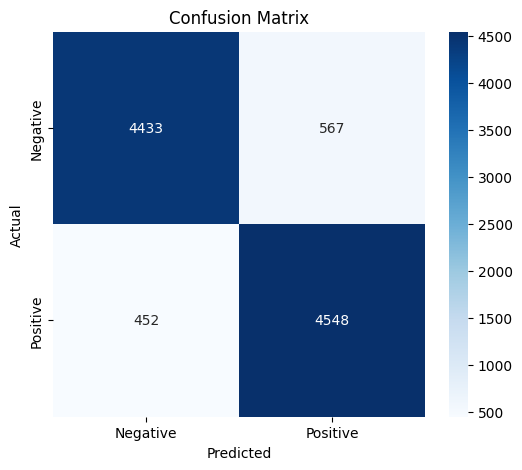

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# FInal Saving:

In [58]:
joblib.dump(best_model, "../models/sentiment_pipeline.pkl")

['../models/sentiment_pipeline.pkl']